# 멕시코풍 프랜차이즈 chipotle의 주문 데이터 분석하기

## 탐색 : 데이터의 기초 정보 살펴보기

### chipotle 데이터셋의 기초 정보 출력하기

In [1]:
# -*- coding: utf-8 -*-

In [2]:
import pandas as pd

In [3]:
file_path = '../workspace/python-data-analysis-master/python-data-analysis-master/data/chipotle.tsv'
# read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
chipo = pd.read_csv(file_path, sep = '\t')

print(chipo.shape)
print("----------------")
print(chipo.info())

(4622, 5)
----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB
None


### chipotle 데이터셋의 행과 열, 데이터 확인하기

In [4]:
# chipo라는 데이터 프레임에서 순서대로 10개의 데이터를 보여줍니다.
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [5]:
print(chipo.columns)
print("----------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
----------------------------
RangeIndex(start=0, stop=4622, step=1)


### describe() 함수로 기초 통계량 출력하기

In [6]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환합니다.
chipo['order_id'] = chipo['order_id'].astype(str)
print(chipo.describe()) # chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인합니다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


### unique() 함수로 범주형 피처의 개수 출력하기

In [7]:
print(len(chipo['order_id'].unique())) # order_id의 개수를 출력합니다.
print(len(chipo['item_name'].unique())) # item_name의 개수를 출력합니다.

1834
50


## 인사이트의 발견 : 탐색과 시각화하기

### 가장 많이 주문한 아이템 Top 10 출력하기

In [8]:
# 가장 많이 주문한 아이템 Top 10을 출력합니다.
item_count = chipo['item_name'].value_counts()[:10]
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":",val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


### 아이템별 주문 개수와 총량 구하기

In [9]:
# 아이템별 주문 개수를 출력합니다.
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # 아이템별 주문 개수를 출력합니다.

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [10]:
# 아이템별 주문 총량을 계산합니다.
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # 아이템별 주문 총량을 계산합니다.

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

### 시각화로 분석 결과 살펴보기

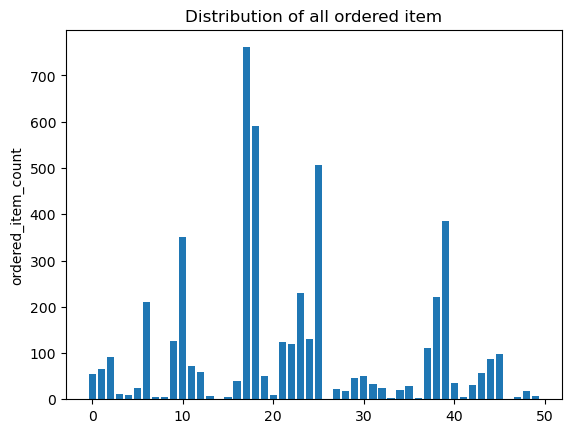

In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

plt.show()

#### 미니퀴즈 1_1

In [12]:
# 판다스에서 유용하게 사용하는 함수 value_counts()와 unique()의 차이점은?
 #어떤 데이터 타입에 적용 / 어떤 기능 / 정확히 어떤 결과값 반환

In [13]:
chipo['item_name'].value_counts()

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [14]:
chipo['item_name'].unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

## 데이터 전처리 : 전처리 함수 사용하기

### item_price 피처 살펴보기

In [15]:
print(chipo.info())
print('----------------')
chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None
----------------


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [16]:
# item_price는 가격인데, 요약 통계 계산 불가 -> 데이터가 문자열 타입이기 때문에
# 확인해보면 숫자 앞에 $ 붙어있음. $를 제거하는 전처리 필요

### apply()와 lambda를 이용해 데이터 전처리하기

In [17]:
# column 단위 데이터에 apply() 함수로 전처리를 적용합니다.
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


## 탐색적 분석 : 스무고개로 개념적 탐색 분석하기

### 주문당 평균 계산금액 출력하기

In [18]:
# 주문당 평균 계산금액을 출력합니다.
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

### 한 주문에 10달러 이상 지불한 주문 번호(id) 출력하기

In [19]:
# 한 주문에 10달러 이상 지불한 id를 출력합니다.
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


### 각 아이템의 가격 구하기

In [21]:
# 각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


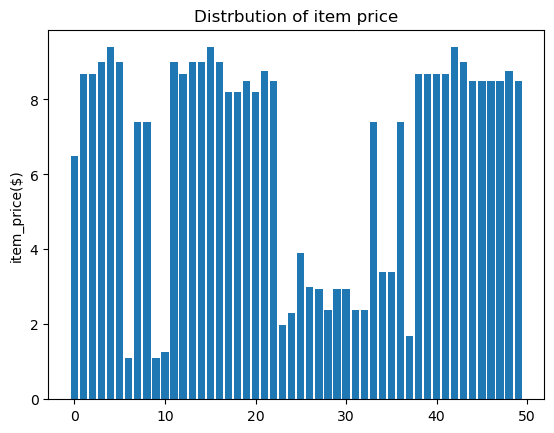

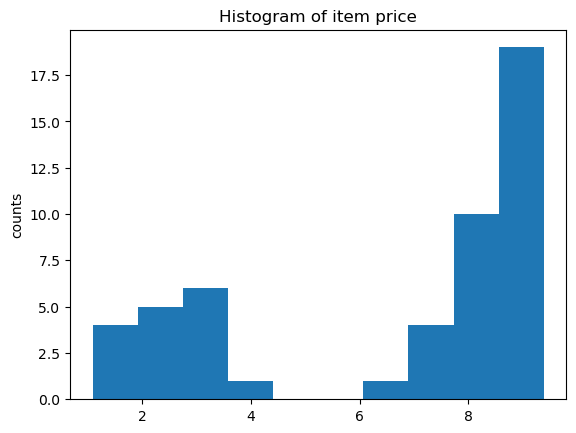

In [26]:
# 아이템 가격 분포 그래프를 출력합니다.
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align='center')
plt.ylabel('item_price($)')
plt.title('Distrbution of item price')
plt.show()

# 아이템 가격 히스토그램을 출력합니다.
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')
plt.show()

### 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기

In [27]:
# 가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

,quantity,item_price
order_id,,
926,23,205.25
1443,35,160.74
1483,14,139.00
691,11,118.25
1786,20,114.30


### Veggie Salad Bowl'이 몇 번 주문되었는지 구하기

In [28]:
# 'Veggie Salad Bowl'이 몇 번 주문되었는지를 계산합니다.
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
# 한 주문 내에서 중복 집계된 item_name을 제거합니다.
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id'])

print(len(chipo_salad))
chipo_salad.head(5)

18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",8.75


### 'Chicken Bowl'을 2개 이상 주문한 주문 횟수 구하기

In [33]:
# "Chicken Bowl"을 2개 이상 주문한 주문 횟수를 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_result = chipo_chicken[chipo_chicken['quantity'] >= 2]
print(chipo_chicken_result.shape[0])

33


# 국가별 음주 데이터 분석하기

## 탐색 : 데이터의 기초 정보 살펴보기

### drinks 데이터셋의 기초 정보 출력하기

In [42]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../workspace/python-data-analysis-master/python-data-analysis-master/data/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv() 함수로 데이터를 데이터 프레임 형태로 불러옵니다.
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [43]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


## 인사이트의 발견 : 탐색과 시각화하기

### 두 피처 간의 상관 계수 구하기

In [44]:
# beer_servings, wine_servings 두 피처 간의 상관 계수를 계산합니다.
# pearson은 상관 계수를 구하는 계산 방법 중 하나를 의미하며, 가장 널리 쓰이는 방법입니다.
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
print(corr)

               beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000


In [46]:
# 피처 간의 상관 계수 행렬을 구합니다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


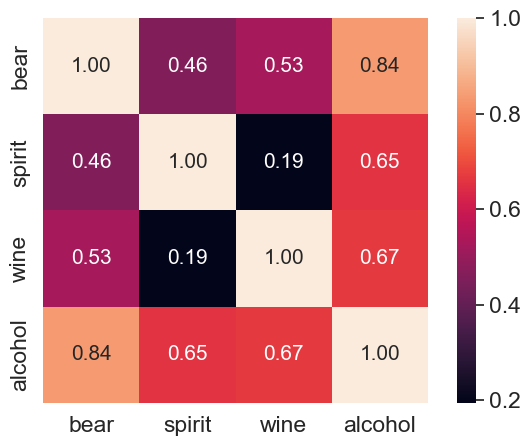

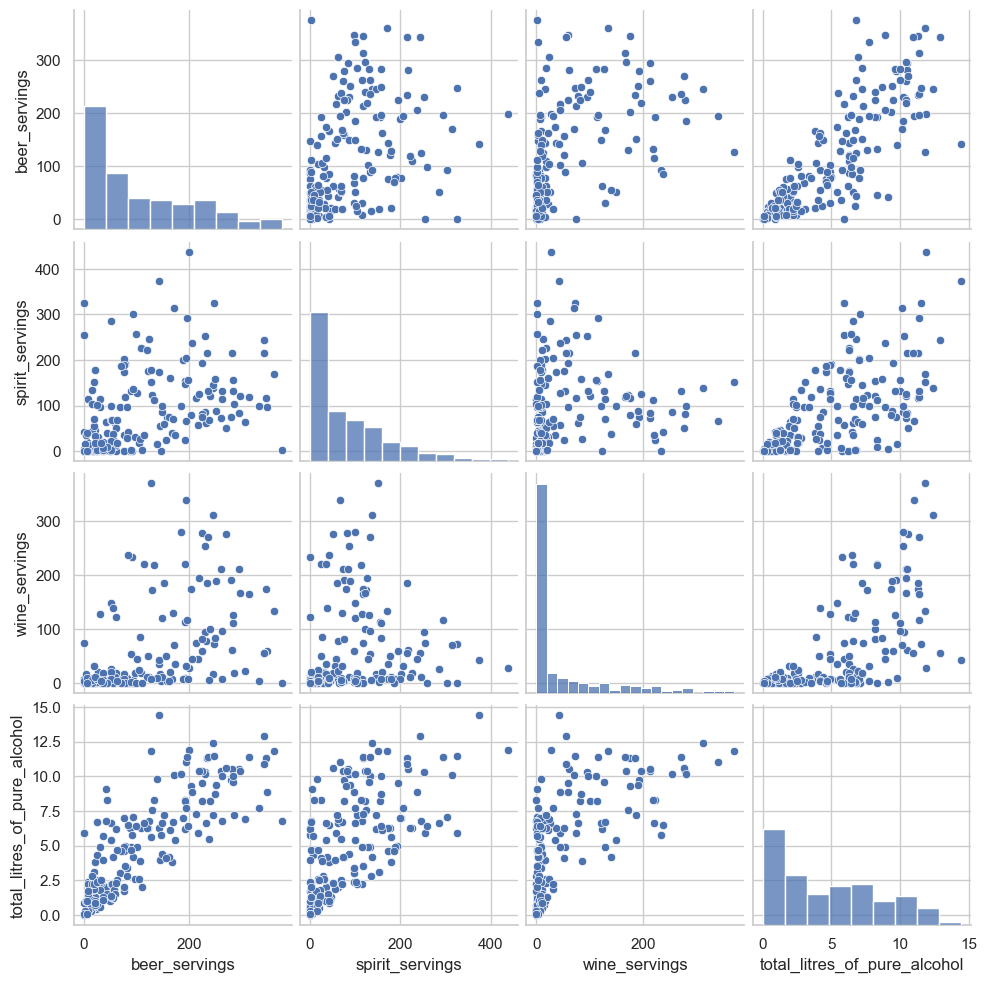

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['bear', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 출력합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
                cbar = True,
                annot = True,
                square = True,
                fmt = '.2f',
                annot_kws = {'size': 15},
                yticklabels = cols_view,
                xticklabels = cols_view)

plt.tight_layout()
plt.show()

# 시각화 라이브러리를 이용한 피처 간의 산점도 그래프를 출력합니다.
sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)
plt.show()

## 탐색적 분석: 스무고개로 개념적 탐색 분석하기

## 결측 데이터 전처리하기

In [52]:
# 결측 데이터를 처리합니다: 기타 대륙으로 통합 -> 'OT'
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


## 파이차트로 시각화하기

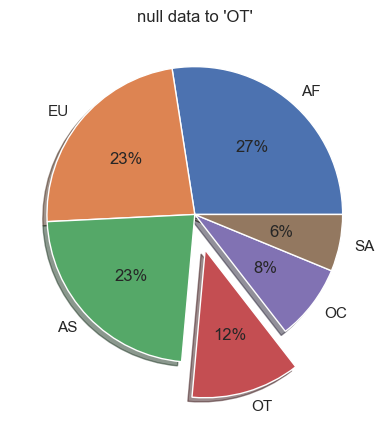

In [63]:
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode,labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')
plt.show()

In [64]:
print(labels)
print(fracs1)

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']
[53, 45, 44, 23, 16, 12]


### agg() 함수를 이용해 대륙별로 분석하기

In [65]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산합니다.
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result.head()

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812


In [66]:
# 전체 평균보다 많은 알코올을 섭취하는 대륙을 구합니다.
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
print(continent_over_mean)

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64


In [67]:
# 평균 beer_servings가 가장 높은 대륙을 구합니다.
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
print(beer_continent)

EU


### 분석 결과를 시각화하기

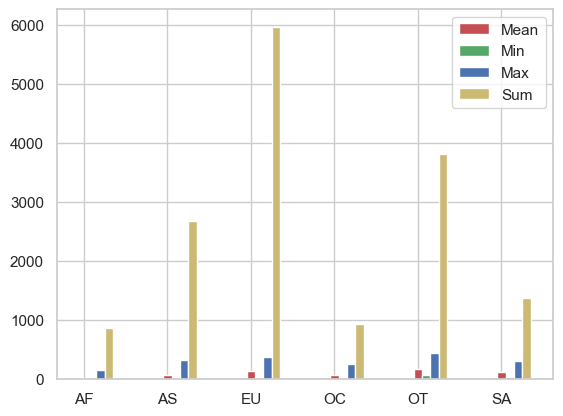

In [68]:
# 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1

rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b', label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y', label='Sum')

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

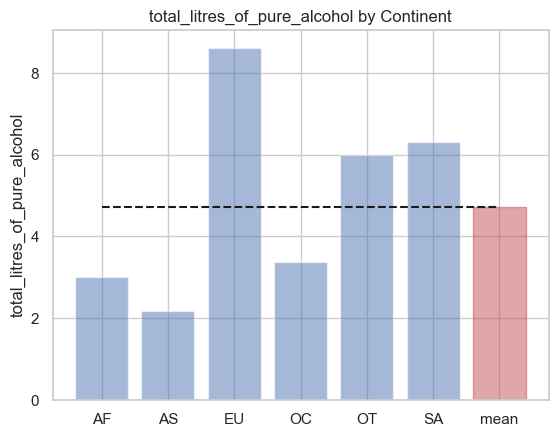

In [85]:
# 대률별 total_litres_of_pure_alcohol을 시각화합니다.
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5)
bar_list[len(continents) -1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], "k--")
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

plt.show()

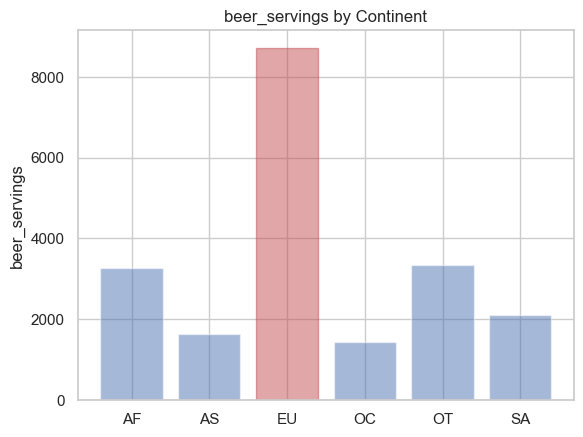

In [88]:
# 대륙별 beer_servings를 시작합니다.
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

In [90]:
print(means)
print(mins)
print(maxs)
print(sums)

[16.339622641509433, 60.84090909090909, 132.55555555555554, 58.4375, 165.7391304347826, 114.75]
[0, 0, 0, 0, 68, 25]
[152, 326, 373, 254, 438, 302]
[866, 2677, 5965, 935, 3812, 1377]


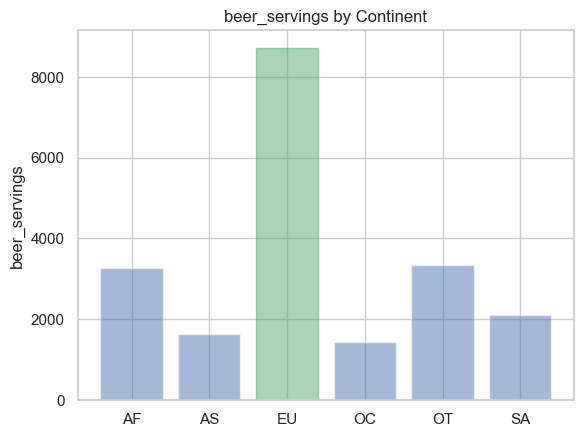

In [91]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

plt.show()

## 통계적 분석: 분석 대상 간의 통계적 차이 검정하기

### 아프리카와 유럽 간의 맥주 소비량 차이 검정하기

In [96]:
# 아프리카와 유럽 간의 맥주 소비량 차이 검정하기
africa = drinks.loc[drinks['continent']=='AF']
europe = drinks.loc[drinks['continent']=='EU']

from scipy import stats
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
tTestResultDiffVar = stats.ttest_ind(africa['beer_servings'],
                                    europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f" % tTestResultDiffVar)

print(tTestResult)
print(tTestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000
Ttest_indResult(statistic=-7.267986335644365, pvalue=9.719556422442453e-11)
Ttest_indResult(statistic=-7.143520192189803, pvalue=2.9837787864303205e-10)


### '대한민국은 얼마나 술을 독하게 마시는 나라일까?'에 대한 탐색 코드 살펴보기

In [99]:
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알코올 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


### 국가별 순위 정보를 시각화하기

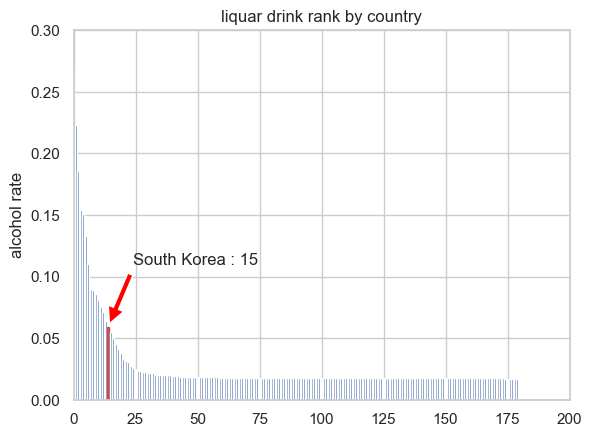

In [108]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquar drink rank by country')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1),
            xy=(korea_rank, korea_alc_rate),
            xytext=(korea_rank + 10, korea_alc_rate + 0.05),
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

# 연습 문제

## drinks 데이터셋

In [112]:
# 1) 대륙별 평균 wine_servings를 탐색합니다.
continent_mean_wine = drinks.groupby('continent')['wine_servings'].mean()
continent_mean_wine.head()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
Name: wine_servings, dtype: float64

In [114]:
# 2) 국가별 모든 servings의 합을 계산한 total_servings 라는 피치를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks[['country', 'beer_servings', 'wine_servings', 'spirit_servings', 'total_servings']].head()

,country,beer_servings,wine_servings,spirit_servings,total_servings
0,Afghanistan,0,0,0,0
1,Albania,89,54,132,275
2,Algeria,25,14,0,39
3,Andorra,245,312,138,695
4,Angola,217,45,57,319


In [121]:
# 3) 전체 평균보다 적은 알코올을 섭취하는 대륙 중 spirit을 가장 많이 마시는 국가를 찾아봅니다. 

total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
print(continent_under_mean)

['AF', 'AS', 'OC']


In [134]:
df_continent_under_mean = drinks.loc[drinks.continent.isin(continent_under_mean)]
#print(df_continent_under_mean)

most_spirit_under_mean = df_continent_under_mean.loc[df_continent_under_mean['spirit_servings'].idxmax()]
#print(most_spirit_under_mean)
most_spirit_under_mean['country']

'Russian Federation'

In [136]:
# 4) 술 소비량 대비 알코올 비율을 구해봅니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495


In [137]:
# 5) 대륙별로 술 소비량 대비 알코올 비율을 계산합니다.
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_litres_of_pure_alcohol'] = continent_sum['total_litres_of_pure_alcohol'] / continent_sum['total_servings']
print(continent_sum)

           beer_servings  spirit_servings  wine_servings  \
continent                                                  
AF                  3258              866            862   
AS                  1630             2677            399   
EU                  8720             5965           6400   
OC                  1435              935            570   
OT                  3345             3812            564   
SA                  2101             1377            749   

           total_litres_of_pure_alcohol  total_servings  alcohol_rate  \
continent                                                               
AF                                159.4            4986      2.636258   
AS                                 95.5            4706      0.719797   
EU                                387.8           21085      0.788717   
OC                                 54.1            2940      0.270327   
OT                                137.9            7721      0.410644   
SA      